# Multi Layer Perceptron

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

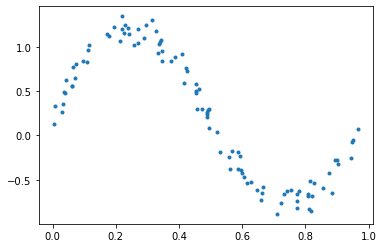

In [5]:
N = 100
X = np.random.rand(N, 1) # 2 dimension tensor
Y = np.sin(2 *np.pi * X) + 0.4 * np.random.rand(N, 1) # 2-d tensor
plt.plot(X, Y, '.')
plt.show()

In [19]:
# 1--W1--100--W2--100--W3--1
# 1 input -- W1 -- 100 nodes -- W2 -- 100 nodes -- W3 -- output 1

W1 = tf.Variable(np.random.randn(1, 100)) # 1 input -- 100 out
b1 = tf.Variable(np.random.randn(100)) # bias 100 out
W2 = tf.Variable(np.random.randn(100, 100)) # 100 input -- 100 out
b2 = tf.Variable(np.random.randn(100)) # bias 100 out
W3 = tf.Variable(np.random.randn(100, 1)) # 100 input -- 1 out
b3 = tf.Variable(np.random.randn(1)) # bias 1 out

def relu(x):
    return tf.where(x >= 0, x, 0)

lr = 0.0001
for epoch in range(7000):
    with tf.GradientTape() as t:
        y = relu(X @ W1 + b1)
        y = relu(y @ W2 + b2)
        y = y @ W3 + b3
        loss = tf.reduce_mean((y - Y)**2)
    dw1, db1, dw2, db2, dw3, db3 = t.gradient(loss, [W1, b1, W2, b2, W3, b3])
    W1.assign_sub(lr * dw1)
    b1.assign_sub(lr * db1)
    W2.assign_sub(lr * dw2)
    b2.assign_sub(lr * db2)
    W3.assign_sub(lr * dw3)
    b3.assign_sub(lr * db3)
    
    if epoch % 1000 == 0:
        print(loss.numpy())

460.2615937218323
0.018317377151979432
0.014783674066754723
0.013713724370568234
0.0130589363508373
0.012644568004042542
0.012328887880774598


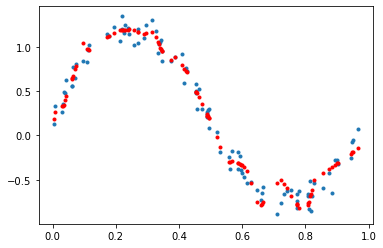

In [20]:
Z = relu(X @ W1 + b1)
Z = relu(Z @ W2 + b2)
Z = Z @ W3 + b3
plt.plot(X, Y, '.')
plt.plot(X, Z, '.r')
plt.show()